# Basic Convolutional Neural Networks (CNN)
- Objective: create basic CNN models with Keras

<img src="https://adeshpande3.github.io/assets/Cover.png" style="width: 800px"/>

<br>

- Fundamental CNN structures: CNNs are similar to Multilayer Perceptrons (MLPs) since they only feed signals forward (feedforward nets), but have different kind of layers unique to CNNs  
  - ** Convolutional layer** : process data in a small receptive field (i.e., filter)  
  - ** Pooling layer** : downsample along 2 dimensions (usually width and height)   
  - ** Dense (fully connected) layer** : similar to hidden layers of MLPs  

<img src="http://cs231n.github.io/assets/cnn/convnet.jpeg" style="width: 600px"/>
<br>
<center> **ConvNet architecture** </center>

In [1]:
!nvidia-smi
!uptime
!nproc

Mon Sep 25 10:46:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 520.61.05    Driver Version: 520.61.05    CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  On   | 00000000:01:00.0 Off |                    0 |
| N/A   27C    P0    63W / 500W |      3MiB / 81920MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA A100-SXM...  On   | 00000000:41:00.0 Off |                    0 |
| N/A   

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../common')
import plt_style as ps

from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

2023-09-25 10:46:24.215094: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Load Datset
- Digits dataset in sklearn
- Doc: http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html

In [3]:
data = datasets.load_digits()

In [4]:
K,M,N = data.images.shape
FI = data.images[:10].reshape((10*M,N))
K

1797

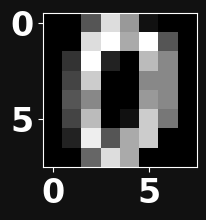

In [5]:
k=0
plt.close()
plt.figure(figsize=(2,2))
plt.imshow(FI[:8,:8],cmap=plt.cm.binary.reversed() )   # show first number in the dataset
#plt.title('label: %d' % data.target[k],fontsize=18,color='w')    # label = '0'
plt.show()

In [6]:
X_data = data.images
y_data = data.target

In [7]:
# shape of data
print(X_data.shape)    # (8 X 8) format
print(y_data.shape)

(1797, 8, 8)
(1797,)


In [8]:
data.target[0]

0

In [9]:
# reshape X_data into 3-D format
# note that this follows image format of Tensorflow backend
X_data = X_data.reshape((X_data.shape[0], X_data.shape[1], X_data.shape[2], 1))

In [10]:
# one-hot encoding of y_data
y_data = to_categorical(y_data)

In [11]:
print(f'Original first digit label: {data.target[0]}')
print('After one-hot encoding:', y_data[0])

Original first digit label: 0
After one-hot encoding: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
# partition data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 777)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1257, 8, 8, 1)
(540, 8, 8, 1)
(1257, 10)
(540, 10)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

### 1. Creating model
- Creating a model is same with MLP (Sequential)
- Original notebook defined a model with an reLU activation layer. We run two of these original models and compare to a model without activation.

In [16]:
# Allow multiple models to have the same seed (note there is still randomness in the model fit)
from numpy.random import seed
from tensorflow.random import set_seed
seed(1)
set_seed(2)

In [17]:
orig_model0 = Sequential()
orig_model1 = Sequential()

2023-09-25 10:47:13.209219: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-25 10:47:15.099707: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78962 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:01:00.0, compute capability: 8.0
2023-09-25 10:47:15.100892: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 78962 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:41:00.0, compute capability: 8.0
2023-09-25 10:47:15.101850: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/rep

### 2. Convolutional Layer
- In general, 2D convolutional layer is used for image processing
    - Size of filter (designated by 'kernel_size' parameter) defines **width and height of receptive field **
    - Number of filters (designated by 'filters' parameter) is equal to **depth of the next layer**
    - Strides (designated by 'strides' parameter) is** how far a filter makes change in its position** for each move
    - Image can be **zero-padded** in order to prevent getting too small (designated by 'padding' parameter)
- Doc: https://keras.io/layers/convolutional/

<img src="http://cs231n.github.io/assets/cnn/depthcol.jpeg" style="width: 400px"/>

In [18]:
# convolution layer
orig_model0.add(Conv2D(input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3]), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid'))
orig_model1.add(Conv2D(input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3]), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid'))

### 3. Activation Layer
- Identical to the activation layers in MLP
- In general, rectified Linear Unit (reLU)  is used as well
- Note that Conv2d step may have applied activation through keyword argument
- Below, reLU activation function is demonstrated

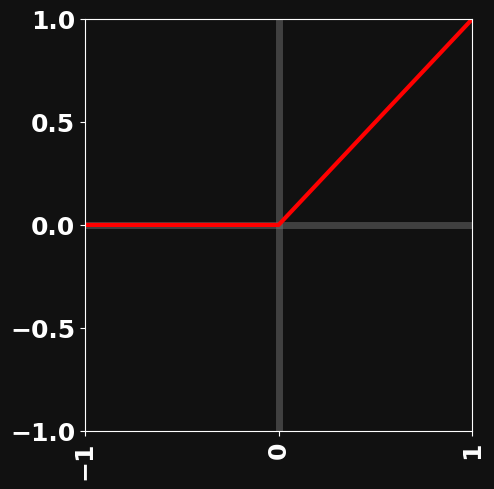

In [19]:
plt.figure(figsize=(5,5.35))
plt.clf()
x = np.linspace(-1,1,15)
myreLU = [ 0 if xx < 0 else xx for xx in x ]
plt.plot(x,0*x,'-',c=ps.gry,lw=5)    # x-axis
plt.plot(0*x,x,'-',c=ps.gry,lw=5)    # y-axis
plt.plot(x,myreLU,'r-',lw=3) # reLU
plt.xticks(color='w',fontsize=18,rotation=90)
plt.yticks(color='w',fontsize=18)
plt.xlim(-1,1)
plt.ylim(-1,1)
#plt.grid(which='major',linestyle='--',color='#777777')
plt.show()

Original model includes activation layer that will not contribute to output. 

Kept for pedagogical reasons, but ask yourself, why the reLU activation layer does not contribute to the result.

In [20]:
orig_model0.add(Activation('relu'))
orig_model1.add(Activation('relu'))

### 4. Pooling layer
- In general, max pooling method is used
- Common alternative is average pooling
- Reduces number of parameters
- Doc: https://keras.io/layers/pooling/

<img src="http://cs231n.github.io/assets/cnn/maxpool.jpeg" style="width: 600px"/>

In [21]:
orig_model0.add(MaxPooling2D(pool_size = (2,2)))
orig_model1.add(MaxPooling2D(pool_size = (2,2)))

### 5. Dense (fully connected layer)
- Convolutional & pooling layers can be connected to dense layers
- Sometimes, dense layers can be omitted
- Doc: https://keras.io/layers/core/

In [22]:
# prior layer should be flattend to be connected to dense layers
orig_model0.add(Flatten())
orig_model1.add(Flatten())

In [23]:
# dense layer with 50 neurons
orig_model0.add(Dense(50, activation = 'relu'))
orig_model1.add(Dense(50, activation = 'relu'))

In [24]:
# final layer with 10 neurons to classify the instances
orig_model0.add(Dense(10, activation = 'softmax'))
orig_model1.add(Dense(10, activation = 'softmax'))

### 6. Model compile & train
- Optimize with adaptive moment estimation (Adam)
- accuracy as the metric

In [25]:
adam = optimizers.Adam(lr = 0.001)
orig_model0.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
orig_model1.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

/packages/envs/tensorflow-gpu-2.10.0/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [26]:
print('Original Model 0 Summary')
orig_model0.summary()
print('Original Model 1 Summary')
orig_model1.summary()

Original Model 0 Summary
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 6, 10)          100       
                                                                 
 activation (Activation)     (None, 6, 6, 10)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 10)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 90)                0         
                                                                 
 dense (Dense)               (None, 50)                4550      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                               

In [27]:
orig_history0 = orig_model0.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 1, shuffle=False)
print(72*'-')
orig_history1 = orig_model1.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 1, shuffle=False)

Epoch 1/100


2023-09-25 10:47:24.017498: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401
2023-09-25 10:47:24.779137: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-09-25 10:47:24.852524: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


21/21 [==============================] - 2s 10ms/step - loss: 3.3353 - accuracy: 0.1900 - val_loss: 1.9095 - val_accuracy: 0.3175
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 1.5746 - accuracy: 0.4647 - val_loss: 1.0765 - val_accuracy: 0.6587
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.9670 - accuracy: 0.7144 - val_loss: 0.6944 - val_accuracy: 0.7897
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6782 - accuracy: 0.8149 - val_loss: 0.5068 - val_accuracy: 0.8452
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5177 - accuracy: 0.8577 - val_loss: 0.3997 - val_accuracy: 0.8810
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4136 - accuracy: 0.8866 - val_loss: 0.3298 - val_accuracy: 0.8968
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3395 - accuracy: 0.9045 - val_loss: 0.2806 - val_accuracy: 0.9206
Epoch 8/100
21/21 [=====

In [28]:
orig_history0.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

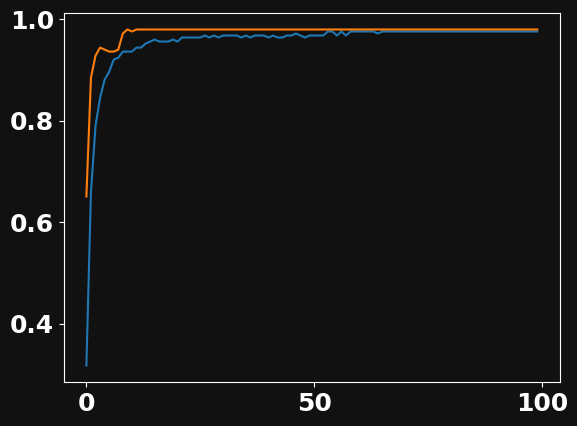

In [30]:
plt.clf()
plt.plot(orig_history0.history['val_accuracy'])
plt.plot(orig_history1.history['val_accuracy'])
plt.xticks(color='w',fontsize=18)
plt.yticks(color='w',fontsize=18)
plt.show()

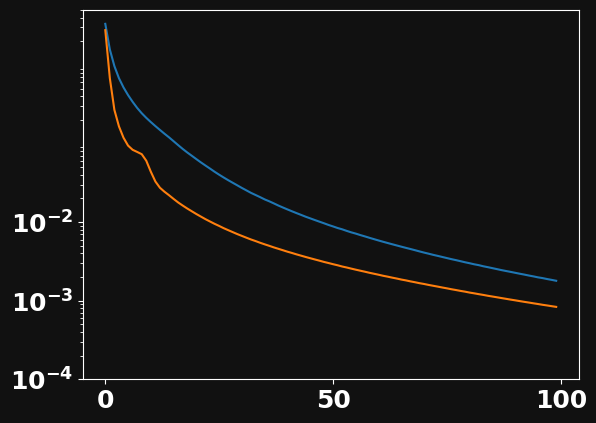

In [31]:
plt.clf()
plt.semilogy(orig_history0.history['loss'])
plt.semilogy(orig_history1.history['loss'])
plt.xticks(color='w',fontsize=18)
plt.yticks([1e-2,1e-3,1e-4],color='w',fontsize=18)
plt.show()

In [32]:
orig_results0 = orig_model0.evaluate(X_test, y_test,verbose=0)
orig_results1 = orig_model1.evaluate(X_test, y_test,verbose=0)

In [33]:
print('   0-Original Test accuracy: ', orig_results0[1])
print('   1-Original Test accuracy: ', orig_results1[1])
print('MUST PERFORM STATISTICS EVEN ON SIMPLE DATASETS')
print(' AND THINK CAREFULLY ABOUT THE LAYERS WE THINK WE ARE ADDING')

   0-Original Test accuracy:  0.970370352268219
   1-Original Test accuracy:  0.9722222089767456
MUST PERFORM STATISTICS EVEN ON SIMPLE DATASETS
 AND THINK CAREFULLY ABOUT THE LAYERS WE THINK WE ARE ADDING


Summary
---

* Even simple CNN model shows fine performance of **97%** test accuracy
* Difficult to perform small change and measure outcomes deterministically, must use statistics
* Helps to functionally define model and evalute results to improve statistical appreciation of layer construction
* Relatively straightforward to program CNN on ASU HPC systems with Python.

In [34]:
!hostname

dg051.sol.rc.asu.edu


In [35]:
!nvidia-smi

Mon Sep 25 10:48:01 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 520.61.05    Driver Version: 520.61.05    CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  On   | 00000000:01:00.0 Off |                    0 |
| N/A   29C    P0    88W / 500W |  80455MiB / 81920MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA A100-SXM...  On   | 00000000:41:00.0 Off |                    0 |
| N/A   